In [2]:
import os
use_CPU = False
if use_CPU:
    os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import json
import numpy as np
import tensorflow as tf
from image_reader import COCOImageReader, PascalVOCImageReader
from data_generator import DataGeneratorFactory

import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)

np.random.seed(231417)

number of classes = 20
1/1 [==============================] - 0s 202ms/step


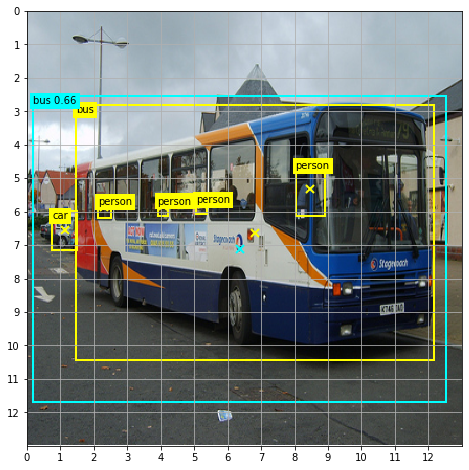

1/1 [==============================] - 0s 15ms/step


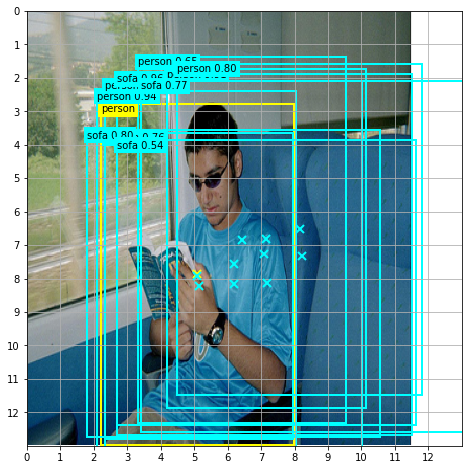

1/1 [==============================] - 0s 15ms/step


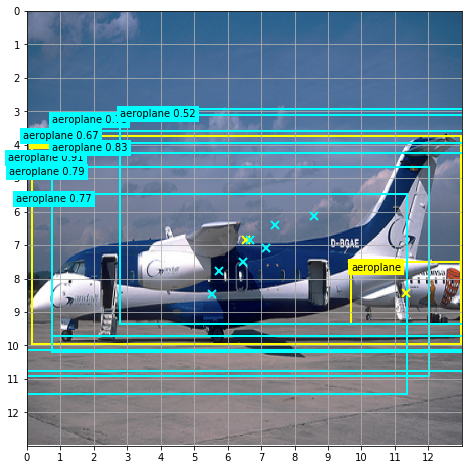

1/1 [==============================] - 0s 17ms/step


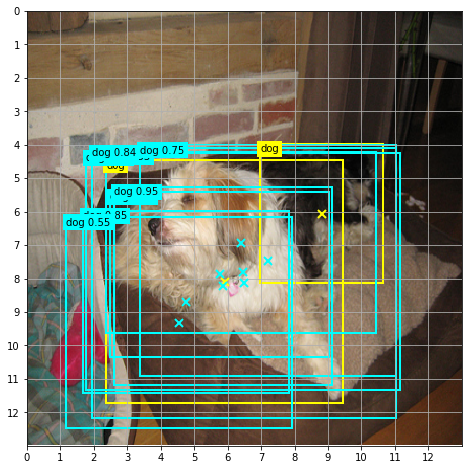

1/1 [==============================] - 0s 15ms/step


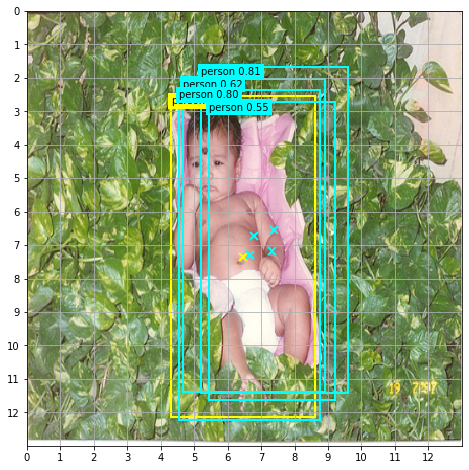

1/1 [==============================] - 0s 17ms/step


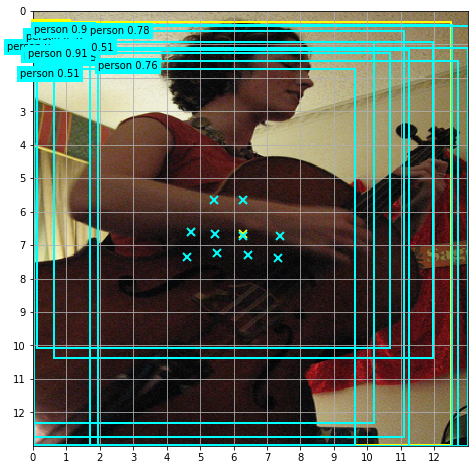

1/1 [==============================] - 0s 18ms/step


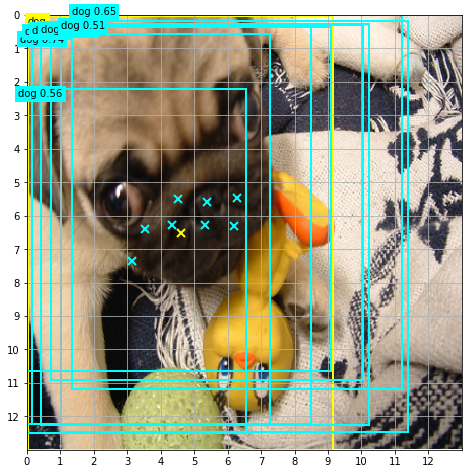

1/1 [==============================] - 0s 17ms/step


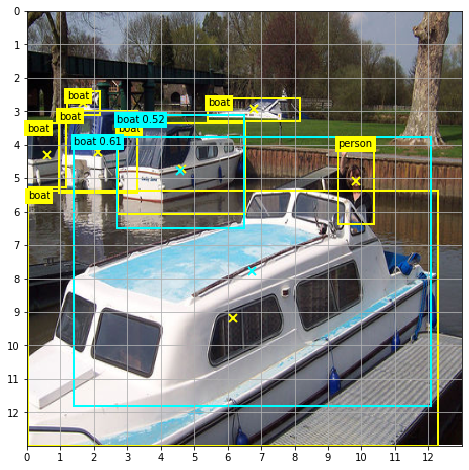

In [4]:
# Load anchor boxes
anchor_boxes_filename = "anchor_boxes_pascalvoc.json"

# Read anchor boxes from json file
with open(anchor_boxes_filename, "r", encoding="utf8") as f:
    anchor_boxes = json.load(f)

# Load saved model from disk
model = tf.keras.models.load_model('../assets/saved_model_09Jun2022',compile=False)

image_reader = PascalVOCImageReader(data_dir="../../../pascalvocdata/VOC2012/",data_type="train",image_size=416,n_tiles=13)
data_generator = DataGeneratorFactory(anchor_boxes, image_reader,random_shuffle=True,max_images=None)

for x in data_generator.dataset.batch(1).take(8):
    bboxes_true = data_generator.target2bboxes(x[1][0,...])
    y_pred = model.predict(x[0])
    bboxes_pred = data_generator.prediction2bboxes(y_pred[0,...],threshold=0.5)
    image_reader.show_annotated_image({'image':x[0][0,...],'bboxes':bboxes_true},
                                             predicted_bboxes=bboxes_pred)
    